In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


In [14]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

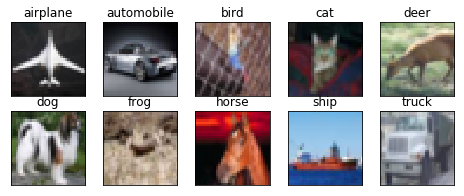

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [16]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_36 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 10s 25ms/step - loss: 1.8162 - acc: 0.3112 - val_loss: 1.3906 - val_acc: 0.4830
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3331 - acc: 0.5182 - val_loss: 1.1762 - val_acc: 0.5740
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1094 - acc: 0.6081 - val_loss: 0.9591 - val_acc: 0.6597
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9575 - acc: 0.6670 - val_loss: 0.8396 - val_acc: 0.7069
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8626 - acc: 0.7037 - val_loss: 0.7812 - val_acc: 0.7344
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7908 - acc: 0.7289 - val_loss: 0.7643 - val_acc: 0.7419
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7387 - acc: 0.7487 - val_loss: 0.6804 - val_acc: 0.7689
Epoch 8/100
390/390 [==============================] - 9s 23m

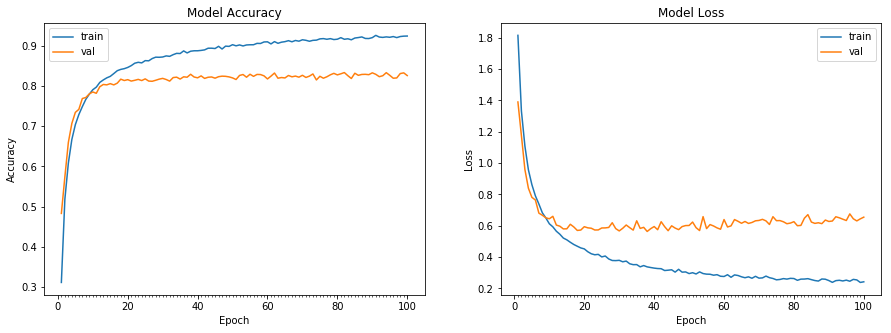

Accuracy on test data is: 82.60


In [13]:
# 1,172,400
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

 **Base Model**
- last epoc's val_acc = 0.8260
- highest val_acc = 0.8335 in 82nd epoc

### 6A

In [21]:
# 6A
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 3,30
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3)) # 5,28
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3)) # 7,26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 1)) # 7,26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 14,13
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3)) # 16,11
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3)) # 18,9
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 1)) # 18,9
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 36,4
model.add(Dropout(0.25))

model.add(Convolution2D(10, 5)) 
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_29 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 128)       73856     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  if sys.path[0] == '':


Epoch 1/80
390/390 [==============================] - 18s 46ms/step - loss: 1.4595 - acc: 0.5036 - val_loss: 1.6511 - val_acc: 0.4243
Epoch 2/80
390/390 [==============================] - 16s 42ms/step - loss: 1.0541 - acc: 0.6562 - val_loss: 1.0208 - val_acc: 0.6559
Epoch 3/80
390/390 [==============================] - 16s 41ms/step - loss: 0.8789 - acc: 0.7155 - val_loss: 0.8421 - val_acc: 0.7200
Epoch 4/80
390/390 [==============================] - 16s 41ms/step - loss: 0.7773 - acc: 0.7452 - val_loss: 0.8727 - val_acc: 0.7073
Epoch 5/80
390/390 [==============================] - 16s 41ms/step - loss: 0.7007 - acc: 0.7714 - val_loss: 0.9303 - val_acc: 0.6761
Epoch 6/80
390/390 [==============================] - 16s 41ms/step - loss: 0.6491 - acc: 0.7878 - val_loss: 0.8118 - val_acc: 0.7207
Epoch 7/80
390/390 [==============================] - 16s 41ms/step - loss: 0.5992 - acc: 0.8027 - val_loss: 0.7813 - val_acc: 0.7325
Epoch 8/80
390/390 [==============================] - 16s 41ms

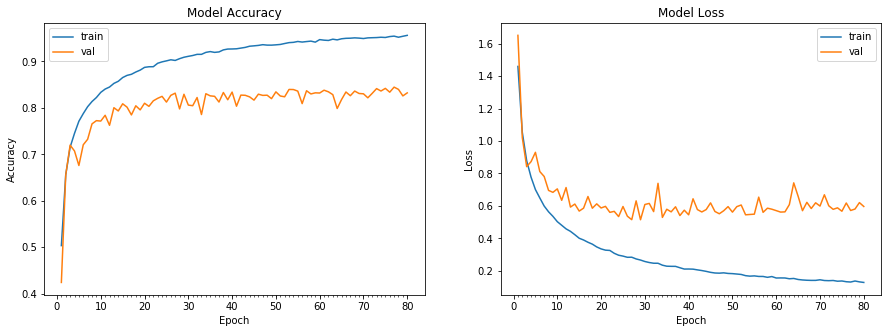

Accuracy on test data is: 83.24


In [15]:
# 216082(2x) + 80ep
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**6A Model**
- last epoc val acc = 0.8324
- highest val acc = 0.8448 in 78th epc

-to-do- 
- Normal Convolution
- Separable Convolution 
- Depthwise Convolution
- Grouped Convolution (use 3x3, 5x5 only)
- Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

### 6B

In [0]:
#6B - w/o BN in grouped conv
from keras.layers import Input, Conv2D, ReLU, SeparableConv2D
from keras.layers.merge import concatenate
from keras.models import Model

input = Input(shape=(32, 32, 3,))

# Normal Convolution
conv2d_1 = Conv2D(16, (3,3), name='normal_conv')(input) # 34
batchnrm1 = BatchNormalization(name='BN_1')(conv2d_1)
act_1 = ReLU()(batchnrm1)

# Separable Convolution
sep_conv_row = Conv2D(32, (3,1), name='row_wise_conv')(act_1)
sep_conv_col = Conv2D(32, (1,3), name='col_wise_conv')(sep_conv_row)
batchnrm2 = BatchNormalization(name='BN_2')(sep_conv_col) # 
act_2 = ReLU()(batchnrm2) # 

# Depthwise Convolution
depth_conv = SeparableConv2D(64, (3,3), name='depth_wise_conv')(act_2)
batchnrm3 = BatchNormalization(name='BN_3')(depth_conv) 
act_3 = ReLU()(batchnrm3)

# Grouped Convolution (3x3, 5x5)
grouped_size3 = Conv2D(128, (3,3), padding='same', name='grp_size_3')(act_3)
act_4 = ReLU()(grouped_size3)

grouped_size5 = Conv2D(128, (5,5), padding='same', name='grp_size_5')(act_3)
act_6 = ReLU()(grouped_size5)

conc1 = concatenate([act_4, act_6],axis=-1)

point_wise_1 = Conv2D(32, (1,1), name='point_wise_1')(conc1)

# Grouped Convolution (3x3 one with dilation = 1, and another with dilation = 2)

grouped_dil_1 = Conv2D(64, (3,3), padding='same', name='conv_w/_dil_1')(point_wise_1)
actv_7 = ReLU()(grouped_dil_1)

grouped_dil_2 = Conv2D(64, (3,3), padding='same', dilation_rate=(2, 2), name='conv_w/_dil_2')(point_wise_1)
actv_8 = ReLU()(grouped_dil_2)

conc2 = concatenate([actv_7, actv_8],axis=-1)

point_wise_2 = Conv2D(16, (1,1), name='point_wise_2')(conc2)

x = Conv2D(10, 26)(point_wise_2) 
batchnrm9 = BatchNormalization(name='BN_9')(x)

y = Flatten()(batchnrm9)
z = Activation('softmax')(y)

model = Model(inputs=[input], outputs=[z])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
normal_conv (Conv2D)            (None, 30, 30, 16)   448         input_18[0][0]                   
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 30, 30, 16)   64          normal_conv[0][0]                
__________________________________________________________________________________________________
re_lu_107 (ReLU)                (None, 30, 30, 16)   0           BN_1[0][0]                       
__________________________________________________________________________________________________
row_wise_c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 29s 76ms/step - loss: 1.4258 - acc: 0.5238 - val_loss: 1.3457 - val_acc: 0.5247
Epoch 2/50
390/390 [==============================] - 26s 68ms/step - loss: 1.0418 - acc: 0.6678 - val_loss: 1.0227 - val_acc: 0.6465
Epoch 3/50
390/390 [==============================] - 26s 67ms/step - loss: 0.8596 - acc: 0.7272 - val_loss: 0.8711 - val_acc: 0.7209
Epoch 4/50
390/390 [==============================] - 26s 66ms/step - loss: 0.7422 - acc: 0.7671 - val_loss: 0.9070 - val_acc: 0.6992
Epoch 5/50
390/390 [==============================] - 26s 67ms/step - loss: 0.6485 - acc: 0.7943 - val_loss: 0.9204 - val_acc: 0.6935
Epoch 6/50
390/390 [==============================] - 26s 67ms/step - loss: 0.5677 - acc: 0.8222 - val_loss: 0.7186 - val_acc: 0.7605
Epoch 7/50
390/390 [==============================] - 26s 67ms/step - loss: 0.4896 - acc: 0.8504 - val_loss: 0.9205 - val_acc: 0.6917
Epoch 8/50
390/390 [==============================] - 26s 67ms

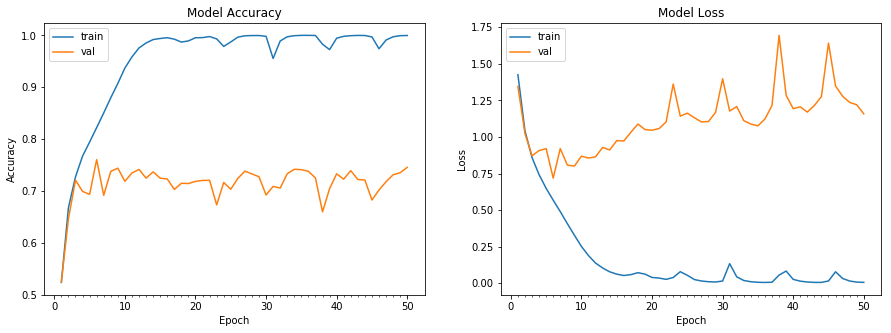

Accuracy on test data is: 74.56


In [36]:
# 442,242 + 50ep + w/o BN 
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Different Model and train logs

In [0]:
#6B + BN in grouped conv
from keras.layers import Input, Conv2D, ReLU, SeparableConv2D
from keras.layers.merge import concatenate
from keras.models import Model

input = Input(shape=(32, 32, 3,))

# Normal Convolution
conv2d_1 = Conv2D(16, (3,3), name='normal_conv')(input) # 34
batchnrm1 = BatchNormalization(name='BN_1')(conv2d_1)
act_1 = ReLU()(batchnrm1)

# Separable Convolution
sep_conv_row = Conv2D(32, (3,1), name='row_wise_conv')(act_1)
sep_conv_col = Conv2D(32, (1,3), name='col_wise_conv')(sep_conv_row)
batchnrm2 = BatchNormalization(name='BN_2')(sep_conv_col) # 
act_2 = ReLU()(batchnrm2) # 

# Depthwise Convolution
depth_conv = SeparableConv2D(64, (3,3), name='depth_wise_conv')(act_2)
batchnrm3 = BatchNormalization(name='BN_3')(depth_conv) 
act_3 = ReLU()(batchnrm3)

# Grouped Convolution (3x3, 5x5)
grouped_size3 = Conv2D(128, (3,3), padding='same', name='grp_size_3')(act_3)
batchnrm4 = BatchNormalization(name='BN_4')(grouped_size3)
act_4 = ReLU()(batchnrm4)

grouped_size5 = Conv2D(128, (5,5), padding='same', name='grp_size_5')(act_3)
batchnrm5 = BatchNormalization(name='BN_5')(grouped_size5)
act_6 = ReLU()(batchnrm5)

conc1 = concatenate([act_4, act_6],axis=-1)

point_wise_1 = Conv2D(32, (1,1), name='point_wise_1')(conc1)

# Grouped Convolution (3x3 one with dilation = 1, and another with dilation = 2)

grouped_dil_1 = Conv2D(64, (3,3), padding='same', name='conv_w/_dil_1')(point_wise_1)
batchnrm6 = BatchNormalization(name='BN_6')(grouped_dil_1)
actv_7 = ReLU()(batchnrm6)

grouped_dil_2 = Conv2D(64, (3,3), padding='same', dilation_rate=(2, 2), name='conv_w/_dil_2')(point_wise_1)
batchnrm7 = BatchNormalization(name='BN_7')(grouped_dil_2)
actv_8 = ReLU()(batchnrm7)

conc2 = concatenate([actv_7, actv_8],axis=-1)

point_wise_2 = Conv2D(16, (1,1), name='point_wise_2')(conc2)

x = Conv2D(10, 26)(point_wise_2) 
batchnrm9 = BatchNormalization(name='BN_9')(x)

y = Flatten()(batchnrm9)
z = Activation('softmax')(y)

model = Model(inputs=[input], outputs=[z])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#6B + BN in grouped conv - actv
from keras.layers import Input, Conv2D, ReLU, SeparableConv2D
from keras.layers.merge import concatenate
from keras.models import Model

input = Input(shape=(32, 32, 3,))

# Normal Convolution
conv2d_1 = Conv2D(16, (3,3), name='normal_conv')(input) # 34
batchnrm1 = BatchNormalization(name='BN_1')(conv2d_1)
act_1 = ReLU()(batchnrm1)

# Separable Convolution
sep_conv_row = Conv2D(32, (3,1), name='row_wise_conv')(act_1)
sep_conv_col = Conv2D(32, (1,3), name='col_wise_conv')(sep_conv_row)
batchnrm2 = BatchNormalization(name='BN_2')(sep_conv_col) # 
act_2 = ReLU()(batchnrm2) # 

# Depthwise Convolution
depth_conv = SeparableConv2D(64, (3,3), name='depth_wise_conv')(act_2)
batchnrm3 = BatchNormalization(name='BN_3')(depth_conv) 
act_3 = ReLU()(batchnrm3)

# Grouped Convolution (3x3, 5x5)
grouped_size3 = Conv2D(128, (3,3), padding='same', name='grp_size_3')(act_3)
batchnrm4 = BatchNormalization(name='BN_4')(grouped_size3)

grouped_size5 = Conv2D(128, (5,5), padding='same', name='grp_size_5')(act_3)
batchnrm5 = BatchNormalization(name='BN_5')(grouped_size5)

conc1 = concatenate([batchnrm4, batchnrm5],axis=-1)

point_wise_1 = Conv2D(32, (1,1), name='point_wise_1')(conc1)

# Grouped Convolution (3x3 one with dilation = 1, and another with dilation = 2)

grouped_dil_1 = Conv2D(64, (3,3), padding='same', name='conv_w/_dil_1')(point_wise_1)
batchnrm6 = BatchNormalization(name='BN_6')(grouped_dil_1)
# actv_7 = ReLU()(batchnrm6)

grouped_dil_2 = Conv2D(64, (3,3), padding='same', dilation_rate=(2, 2), name='conv_w/_dil_2')(point_wise_1)
batchnrm7 = BatchNormalization(name='BN_7')(grouped_dil_2)
# actv_8 = ReLU()(batchnrm7)

conc2 = concatenate([batchnrm6, batchnrm7],axis=-1)

point_wise_2 = Conv2D(16, (1,1), name='point_wise_2')(conc2)

x = Conv2D(10, 26)(point_wise_2) 
batchnrm9 = BatchNormalization(name='BN_9')(x)

y = Flatten()(batchnrm9)
z = Activation('softmax')(y)

model = Model(inputs=[input], outputs=[z])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#6B
from keras.layers import Input, Conv2D, ReLU, SeparableConv2D
from keras.layers.merge import concatenate
from keras.models import Model

input = Input(shape=(32, 32, 3,))

# Normal Convolution
conv2d_1 = Conv2D(16, (3,3), name='normal_conv')(input) # 34
batchnrm1 = BatchNormalization(name='BN_1')(conv2d_1)
act_1 = ReLU()(batchnrm1)

# Separable Convolution
sep_conv_row = Conv2D(32, (3,1), name='row_wise_conv')(act_1)
batchnrm2 = BatchNormalization(name='BN_2')(sep_conv_row) # is this step req
act_2 = ReLU()(batchnrm2) # check

sep_conv_col = Conv2D(32, (1,3), name='col_wise_conv')(act_2)
batchnrm3 = BatchNormalization(name='BN_3')(sep_conv_col) 
actv_3 = ReLU()(batchnrm3) 

# Depthwise Convolution
depth_conv = SeparableConv2D(32, (3,3), name='depth_wise_conv')(actv_3)
batchnrm4 = BatchNormalization(name='BN_4')(depth_conv) 
actv_4 = ReLU()(batchnrm4)

# Grouped Convolution (3x3, 5x5)
grouped_size3 = Conv2D(32, (3,3), padding='same', name='grp_size_3')(actv_4)
batchnrm5 = BatchNormalization(name='BN_5')(grouped_size3) # is this req or only conv w/ actv of both and concat
actv_5 = ReLU()(batchnrm5)

grouped_size5 = Conv2D(32, (5,5), padding='same', name='grp_size_5')(actv_4)
batchnrm6 = BatchNormalization(name='BN_6')(grouped_size5) 
actv_6 = ReLU()(batchnrm6)

conc1 = concatenate([actv_5, actv_6],axis=-1)

# Grouped Convolution (3x3 one with dilation = 1, and another with dilation = 2)

grouped_dil_1 = Conv2D(32, (3,3), padding='same', name='conv_w/_dil_1')(conc1)
batchnrm7 = BatchNormalization(name='BN_7')(grouped_dil_1) 
actv_7 = ReLU()(batchnrm7)

grouped_dil_2 = Conv2D(32, (3,3), padding='same', dilation_rate=(2, 2), name='conv_w/_dil_2')(conc1)
batchnrm8 = BatchNormalization(name='BN_8')(grouped_dil_2) 
actv_8 = ReLU()(batchnrm8)

conc2 = concatenate([actv_7, actv_8],axis=-1)

x = Conv2D(10, 26)(conc2) 
batchnrm9 = BatchNormalization(name='BN_9')(x)

y = Flatten()(batchnrm9)
z = Activation('softmax')(y)

model = Model(inputs=[input], outputs=[z])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 34s 88ms/step - loss: 1.4274 - acc: 0.5274 - val_loss: 1.2852 - val_acc: 0.5478
Epoch 2/50
390/390 [==============================] - 30s 77ms/step - loss: 1.1148 - acc: 0.6449 - val_loss: 1.3232 - val_acc: 0.5418
Epoch 3/50
390/390 [==============================] - 30s 76ms/step - loss: 0.9992 - acc: 0.6769 - val_loss: 1.1347 - val_acc: 0.6148
Epoch 4/50
390/390 [==============================] - 30s 77ms/step - loss: 0.9288 - acc: 0.6976 - val_loss: 0.9544 - val_acc: 0.6770
Epoch 5/50
390/390 [==============================] - 30s 76ms/step - loss: 0.8715 - acc: 0.7127 - val_loss: 0.9818 - val_acc: 0.6665
Epoch 6/50
390/390 [==============================] - 30s 76ms/step - loss: 0.8284 - acc: 0.7265 - val_loss: 0.9294 - val_acc: 0.6800
Epoch 7/50
390/390 [==============================] - 30s 77ms/step - loss: 0.7908 - acc: 0.7374 - val_loss: 1.0538 - val_acc: 0.6504
Epoch 8/50
390/390 [==============================] - 30s 77ms

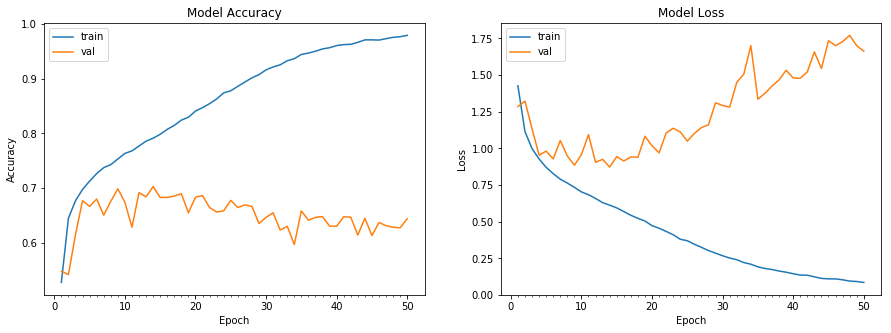

Accuracy on test data is: 64.39


In [42]:
# 443,778 + w/ BN - actv
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 35s 90ms/step - loss: 1.3691 - acc: 0.5484 - val_loss: 1.3448 - val_acc: 0.5553
Epoch 2/50
390/390 [==============================] - 31s 79ms/step - loss: 0.9769 - acc: 0.6960 - val_loss: 1.0811 - val_acc: 0.6391
Epoch 3/50
390/390 [==============================] - 31s 79ms/step - loss: 0.8109 - acc: 0.7480 - val_loss: 1.1847 - val_acc: 0.5922
Epoch 4/50
390/390 [==============================] - 31s 80ms/step - loss: 0.6890 - acc: 0.7867 - val_loss: 1.0393 - val_acc: 0.6469
Epoch 5/50
390/390 [==============================] - 31s 79ms/step - loss: 0.5902 - acc: 0.8183 - val_loss: 1.0798 - val_acc: 0.6382
Epoch 6/50
390/390 [==============================] - 31s 79ms/step - loss: 0.4921 - acc: 0.8529 - val_loss: 1.0861 - val_acc: 0.6541
Epoch 7/50
390/390 [==============================] - 31s 79ms/step - loss: 0.3936 - acc: 0.8901 - val_loss: 0.9977 - val_acc: 0.6745
Epoch 8/50
390/390 [==============================] - 31s 80ms

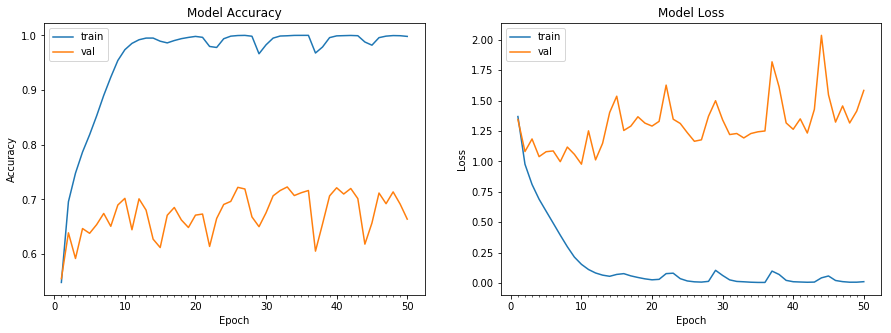

Accuracy on test data is: 66.41


In [39]:
# 443,778 + w/ BN + actv
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 22s 58ms/step - loss: 1.3515 - acc: 0.5538 - val_loss: 1.8233 - val_acc: 0.3747
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9595 - acc: 0.7042 - val_loss: 1.1483 - val_acc: 0.6030
Epoch 3/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7606 - acc: 0.7689 - val_loss: 0.9952 - val_acc: 0.6617
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.5899 - acc: 0.8298 - val_loss: 0.9428 - val_acc: 0.6870
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.4105 - acc: 0.8974 - val_loss: 1.1405 - val_acc: 0.6437
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.2570 - acc: 0.9514 - val_loss: 1.1021 - val_acc: 0.6456
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.1584 - acc: 0.9797 - val_loss: 1.2763 - val_acc: 0.6147
Epoch 8/50
390/390 [==============================] - 20s 52ms

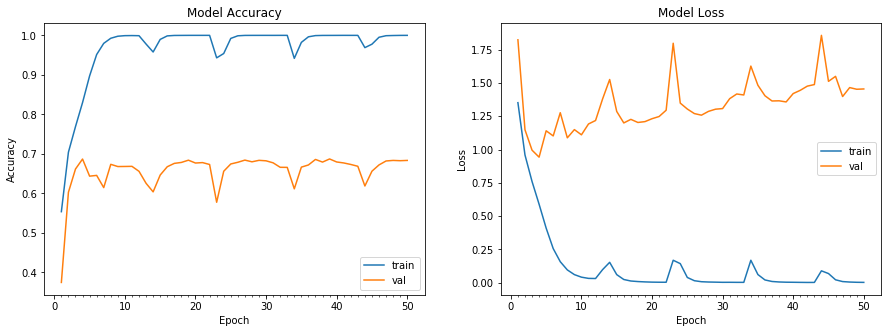

Accuracy on test data is: 68.36


In [30]:
# 511,922 + 50ep + axis-1 exp
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 22s 56ms/step - loss: 1.3072 - acc: 0.5761 - val_loss: 1.1283 - val_acc: 0.6219
Epoch 2/50
390/390 [==============================] - 19s 50ms/step - loss: 0.9358 - acc: 0.7135 - val_loss: 0.9894 - val_acc: 0.6749
Epoch 3/50
390/390 [==============================] - 19s 50ms/step - loss: 0.7421 - acc: 0.7780 - val_loss: 1.1284 - val_acc: 0.6322
Epoch 4/50
390/390 [==============================] - 20s 50ms/step - loss: 0.5654 - acc: 0.8405 - val_loss: 1.0136 - val_acc: 0.6679
Epoch 5/50
390/390 [==============================] - 19s 50ms/step - loss: 0.3865 - acc: 0.9071 - val_loss: 1.0243 - val_acc: 0.6665
Epoch 6/50
390/390 [==============================] - 20s 50ms/step - loss: 0.2389 - acc: 0.9573 - val_loss: 1.0269 - val_acc: 0.6766
Epoch 7/50
390/390 [==============================] - 20s 50ms/step - loss: 0.1471 - acc: 0.9840 - val_loss: 1.1741 - val_acc: 0.6476
Epoch 8/50
390/390 [==============================] - 20s 51ms

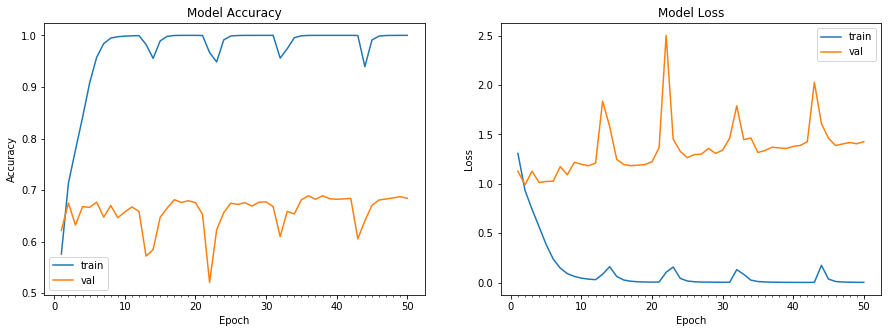

Accuracy on test data is: 68.42


In [27]:
# 511,922 + 50ep
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 38s 98ms/step - loss: 1.3062 - acc: 0.5770 - val_loss: 1.1873 - val_acc: 0.6040
Epoch 2/50
390/390 [==============================] - 32s 82ms/step - loss: 0.9241 - acc: 0.7199 - val_loss: 0.9781 - val_acc: 0.6849
Epoch 3/50
390/390 [==============================] - 32s 81ms/step - loss: 0.7234 - acc: 0.7847 - val_loss: 0.9771 - val_acc: 0.6732
Epoch 4/50
390/390 [==============================] - 32s 82ms/step - loss: 0.5342 - acc: 0.8511 - val_loss: 1.1902 - val_acc: 0.6020
Epoch 5/50
390/390 [==============================] - 32s 82ms/step - loss: 0.3343 - acc: 0.9268 - val_loss: 1.2584 - val_acc: 0.5936
Epoch 6/50
390/390 [==============================] - 32s 83ms/step - loss: 0.1730 - acc: 0.9783 - val_loss: 1.0449 - val_acc: 0.6734
Epoch 7/50
390/390 [==============================] - 32s 83ms/step - loss: 0.0850 - acc: 0.9957 - val_loss: 0.9811 - val_acc: 0.6845
Epoch 8/50
390/390 [==============================] - 32s 83ms

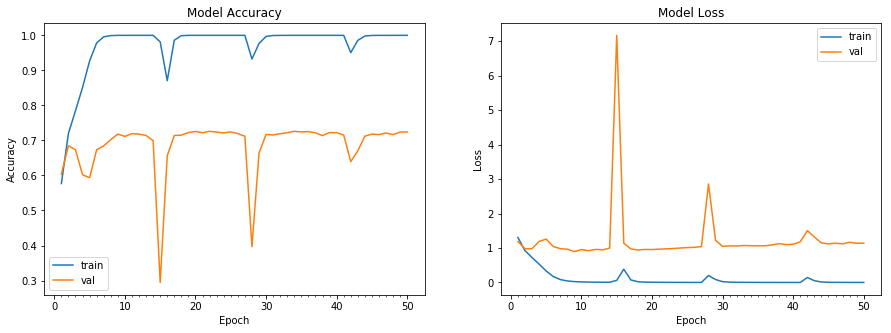

Accuracy on test data is: 72.43


In [24]:
# 1,161,426 + 50ep
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**--EXP--**

In [0]:
from keras.layers import SeparableConv2D, DepthwiseConv2D
model = Sequential()
# model.add(SeparableConv2D(48, 3, 3, input_shape=(32,32,3)))
model.add(DepthwiseConv2D(3, 3,input_shape=(32,32,3)))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [8]:

from keras.layers import Activation, BatchNormalization, Dropout
from keras import regularizers
model = Sequential()

# After 1x1 BN added + mp rm1 
model.add(Convolution2D(48, 3, 3, input_shape=(32,32,3))) # 3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(48, 3)) # 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm1 10

model.add(Convolution2D(48, 3)) # 12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(48, 3)) # 14
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm2

model.add(Convolution2D(48, 3)) # 16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization()) # **
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(BatchNormalization()) # *1
# model.add(Dropout(0.1)) # exp dropout
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3...)`
  import sys
